Columns with null values: ['Age', 'Cabin', 'Embarked']
The average age is: 29.69911764705882


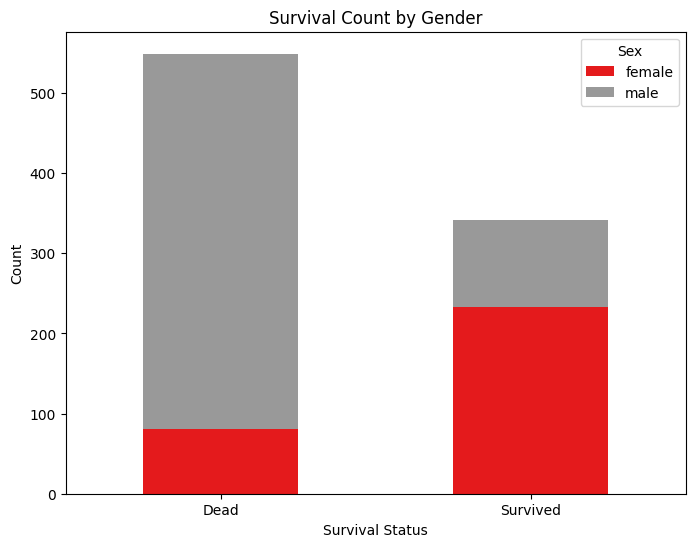

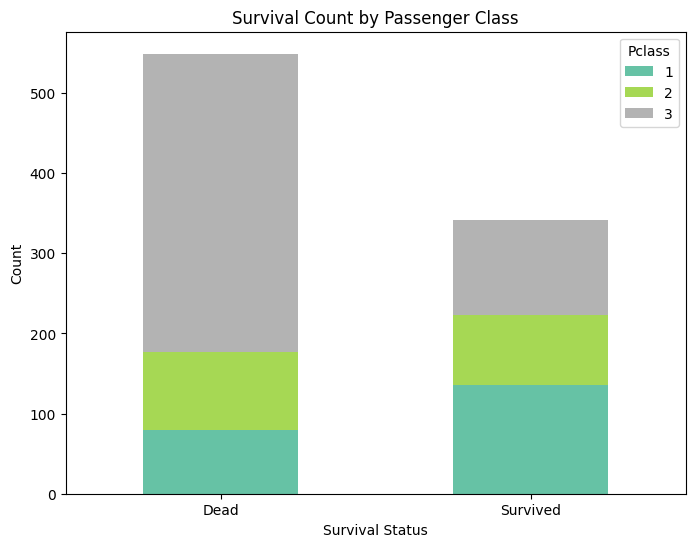

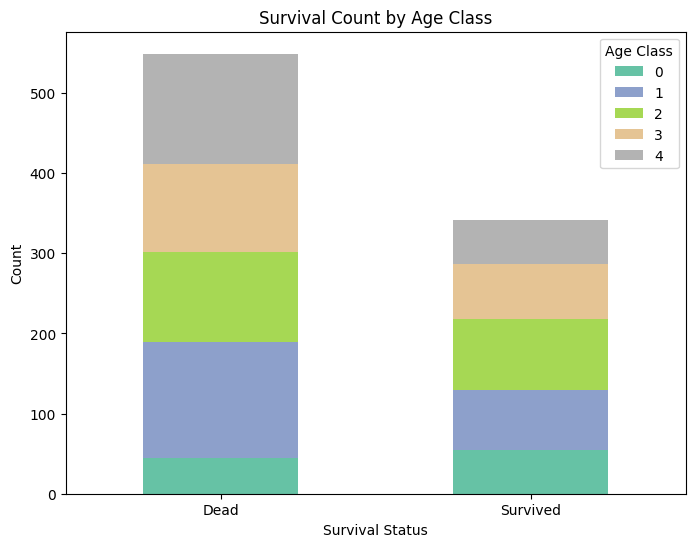

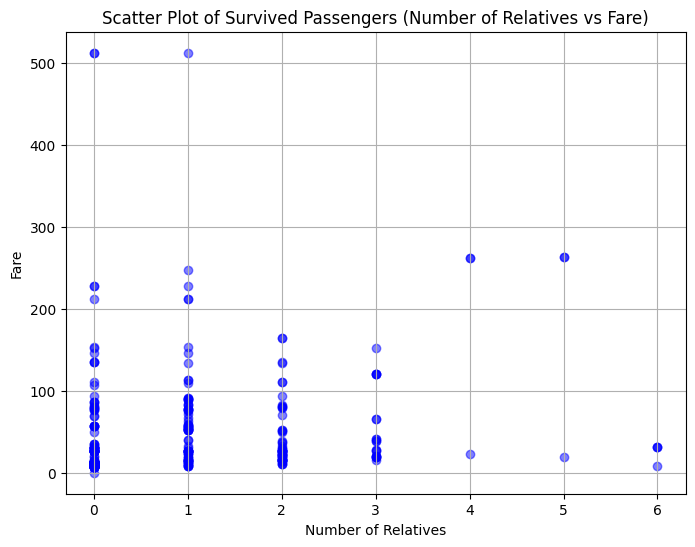

In [1]:
#Project 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Q1: Load the dataset
url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
titanic_df = pd.read_csv(url)
titanic_df


# Q2: Find columns with null values
null_columns = titanic_df.columns[titanic_df.isnull().any()].tolist()
print(f"Columns with null values: {null_columns}")


# Q3: Fill null values
# Fill 'Age' column with the mean of the column
titanic_df['Age'].fillna(titanic_df['Age'].mean())
# Fill 'Cabin' column with 'Unknown'
titanic_df['Cabin'].fillna('Unknown')
average_age = titanic_df['Age'].mean()
print(f"The average age is: {average_age}")
titanic_df


# Q4:
# Count the number of survivors and non-survivors by gender
survival_counts = titanic_df.groupby(["Survived", "Sex"]).size().unstack()

# Plot the stacked bar chart
survival_counts.plot(kind="bar", stacked=True, colormap="Set1", figsize=(8, 6))

# Customize labels
plt.xticks([0, 1], ["Dead", "Survived"], rotation=0)
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.legend(title="Sex")
plt.show()


# Q5:  Count the number of survivors and non-survivors by Pclass
survival_pclass_counts = titanic_df.groupby(["Survived", "Pclass"]).size().unstack()

# Plot the stacked bar chart for Pclass
survival_pclass_counts.plot(kind="bar", stacked=True, colormap="Set2", figsize=(8, 6))
plt.xticks([0, 1], ["Dead", "Survived"], rotation=0)
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.title("Survival Count by Passenger Class")
plt.legend(title="Pclass")
plt.show()



# Q6: Create 'AgeClass' column
def age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

titanic_df['AgeClass'] = titanic_df['Age'].apply(age_class)
titanic_df['AgeClass']
# Q7: Drop the 'Age' column
titanic_df.drop('Age', axis=1, inplace=True)
titanic_df


# Q8: Stacked bar plot of Survived vs Dead by AgeClass
survival_ageclass_counts = titanic_df.groupby(["Survived", "AgeClass"]).size().unstack()
survival_ageclass_counts.plot(kind="bar", stacked=True, colormap="Set2", figsize=(8, 6))
plt.xticks([0, 1], ["Dead", "Survived"], rotation=0)
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.title("Survival Count by Age Class")
plt.legend(title="Age Class")
plt.show()


# Assignment : 4
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv")

# Create 'Number of Relatives' column
df['Number of Relatives'] = df['SibSp'] + df['Parch']
df['Number of Relatives']
# Filter only passengers who survived
survived_passengers = df[df['Survived'] == 1]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(survived_passengers['Number of Relatives'], survived_passengers['Fare'], alpha=0.5, color='blue')
plt.xlabel('Number of Relatives')
plt.ylabel('Fare')
plt.title('Scatter Plot of Survived Passengers (Number of Relatives vs Fare)')
plt.grid(True)
plt.show()